<a href="https://colab.research.google.com/github/eduardogranillo/FisicaComputacional/blob/master/Evaluacion2/Evaluacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Segunda Evaluación Física Computacional 1 (2021-1)

(5 de Abril de 2021)

Se pide resolver numéricamente la ecuación diferencial de un [oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal](https://en.wikipedia.org/wiki/Harmonic_oscillator#Sinusoidal_driving_force), con ayuda de la función *odeint* de *scipy.integrate*.

La ecuación diferencial del oscilador amortiguado es

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}

y $\zeta$ es la tasa de amortiguamiento dado por la expresión

\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}

siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire. 

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$). 

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:


* Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar. 
* Críticamente amortiguado ($\zeta = 1$).
* Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente. 
* Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular. 



**Problema1.**

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$: 

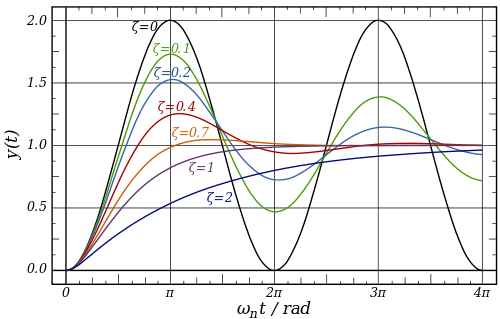

Solución:

Tenemos
\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = 0 \end{equation*}

con

\begin{equation*}
\omega_n = \sqrt{\frac{9}{1}}
\end{equation*}

y
\begin{equation*}
\zeta = \frac{c}{2 \sqrt{9*1}}
\end{equation*}

Con la derivada de x respecto a t como la velocidad:

\begin{equation*}
\frac{dv}{dt} + 2 \zeta \omega_n v+\omega_n^2 x = 0 \end{equation*}

In [39]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [40]:
# Definimos la función del oscilador

# definimos la función F de lado derecho de la ecuación.
def oscilador1(y,t,z,w_n,F_0,m,w):
        x, v = y
        dydt = [v, F_0*np.sin(w*t)/m - 2*z*w_n*v - w_n**2*x]
        return dydt


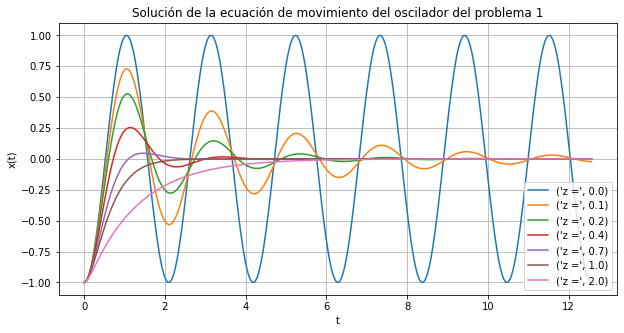

In [41]:
# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=4*np.pi
Npts=400

# Definimos el tiempo de integración
t = np.linspace(t0,tmax,Npts)

# Definimos los coeficientes
z = 2.0 # Este después varía
w_n = np.sqrt(9)
F_0 = 0
w = 0 # Se supone cero pero no afecta
m = 1

# Definimos las condiciones iniciales 
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [-1.0, 0.0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

plt.figure(figsize=(10, 5))
for z in 0.0,0.1,0.2,0.4,0.7,1.0,2.0:
  y = odeint(oscilador1, y_0, t, args=(z,w_n,F_0,m,w), atol=abserr, rtol=relerr)
  plt.plot(t, y[:,0], label=("z =", z))
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador del problema 1')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()


**Problema 2.**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$). 

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

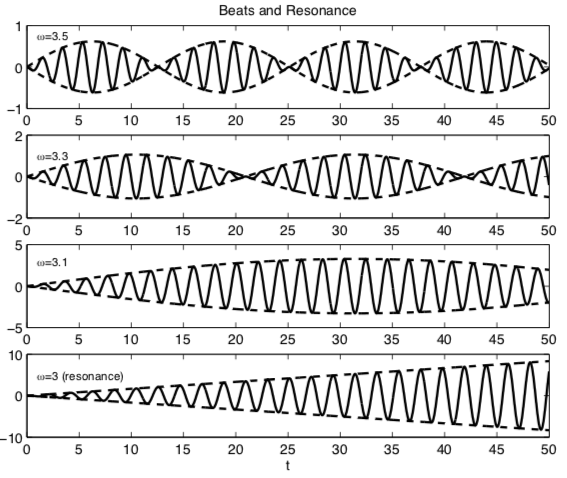

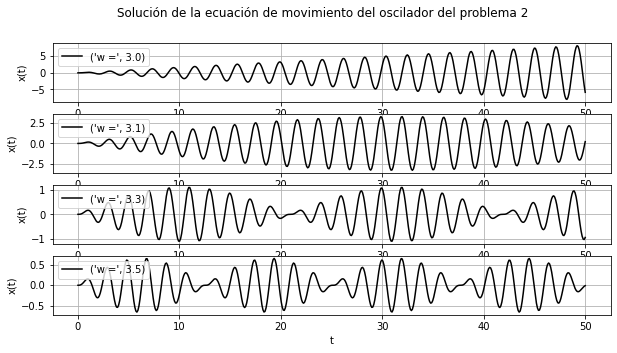

In [58]:
# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=50
Npts=500

# Definimos el tiempo de integración
t = np.linspace(t0,tmax,Npts)

# Definimos los coeficientes
z = 0.0
w_n = np.sqrt(9)
F_0 = 1
w = 3 # Este después varía
m = 1

# Definimos las condiciones iniciales 
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [0.0, 0.0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

# Parámetro para acomodar los subplots
splt = 411 

plt.figure(figsize=(10, 5))
for w in 3.0,3.1,3.3,3.5:
  y = odeint(oscilador1, y_0, t, args=(z,w_n,F_0,m,w), atol=abserr, rtol=relerr)
  plt.subplot(splt)
  plt.plot(t, y[:,0], 'black', label=("w =", w))
  plt.legend(loc='best')
  plt.xlabel('t')
  plt.ylabel('x(t)')
  plt.grid()
  splt=splt+1
plt.xlabel('t')
plt.ylabel('x(t)')
plt.suptitle('Solución de la ecuación de movimiento del oscilador del problema 2')
plt.show()

**Problema 3.**

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$. 

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado. 



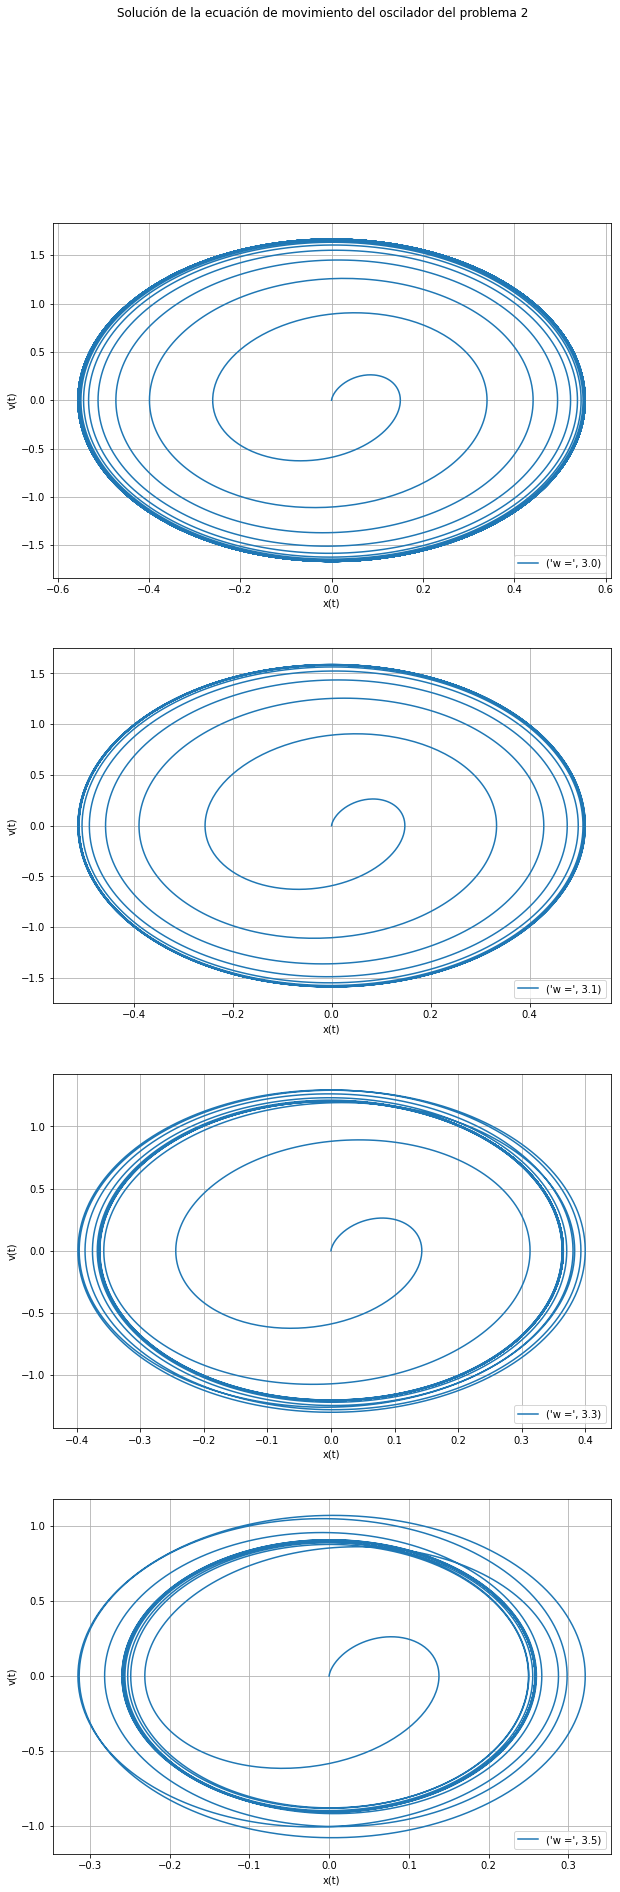

In [88]:
# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=50
Npts=5000

# Definimos el tiempo de integración
t = np.linspace(t0,tmax,Npts)

# Definimos los coeficientes
z = 0.1
w_n = np.sqrt(9)
F_0 = 1
w = 3 # Este después varía
m = 1

# Definimos las condiciones iniciales 
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [0.0, 0.0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

# Parámetro para acomodar los subplots
splt = 411

plt.figure(figsize=(10, 30))
for w in 3.0,3.1,3.3,3.5:
  y = odeint(oscilador1, y_0, t, args=(z,w_n,F_0,m,w), atol=abserr, rtol=relerr)
  plt.subplot(splt)
  plt.plot(y[:,0], y[:,1], label=("w =", w))
  plt.plot(label=("w =", w))
  plt.legend(loc='lower right')
  plt.xlabel('x(t)')
  plt.ylabel('v(t)')
  plt.grid()
  splt=splt+1

plt.suptitle('Solución de la ecuación de movimiento del oscilador del problema 2')
plt.show()